In [1]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dark_horse = cv2.imread('../DATA/horse.jpg')
horse_rgb = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('../DATA/rainbow.jpg')
rainbow_rgb = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('../DATA/bricks.jpg')
bricks_rgb = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

In [43]:
def display_image(img, cmap=None):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

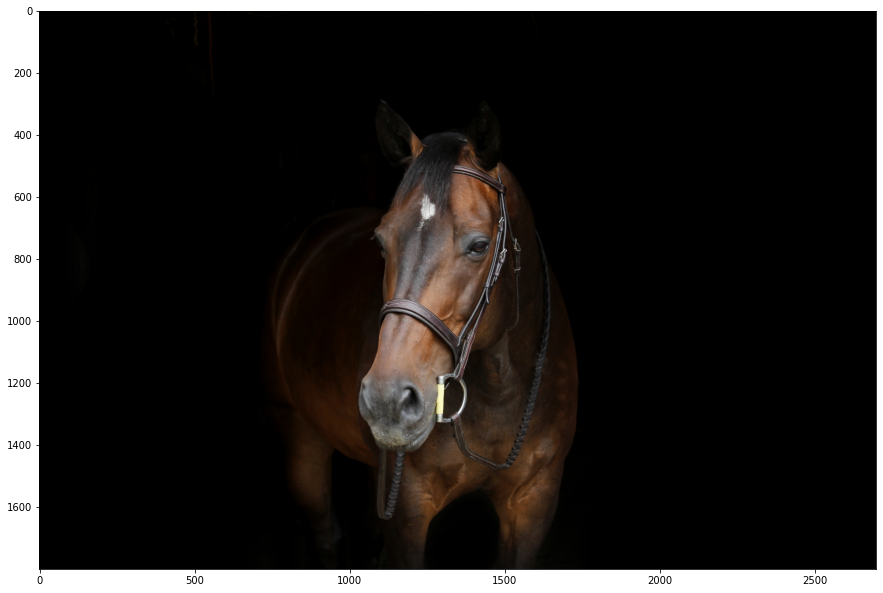

In [4]:
display_image(horse_rgb)

In [47]:
def histogram_color(img, xsize=256, color_hist=None, mask=None):
    color = {'blue':'b','green':'g','red':'r'}
    channel = {'blue':0,'green':1,'red':2}
    if len(list(color.values())) > 1 and color_hist == None :
        for i in enumerate(list(color.values())):
            histr = cv2.calcHist([img],[i[0]],mask,[256],[0,256])
            plt.plot(histr, color=list(color.values())[i[0]])
            plt.xlim([0,xsize])
    elif color_hist != None and color_hist in list(color.keys()):
        histr = cv2.calcHist([img],[channel[color_hist]],mask,[256],[0,256])
        plt.plot(histr, color = color[color_hist])
        plt.xlim([0,xsize])
    elif color_hist == 'gray':
        histr = cv2.calcHist([img],[0],mask,[256],[0,256])
        plt.plot(histr)
        plt.xlim([0,xsize])
    

    plt.title('HISTOGRAM')

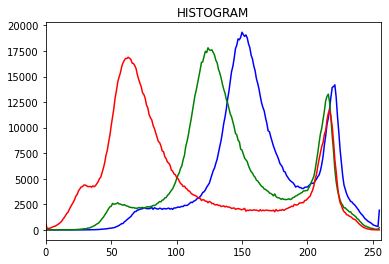

In [39]:
histogram_color(blue_bricks)

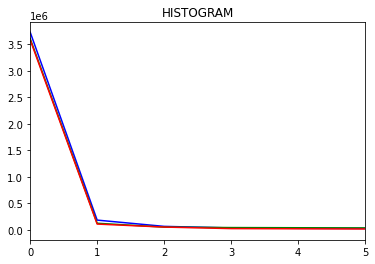

In [7]:
histogram_color(dark_horse,xsize=5)

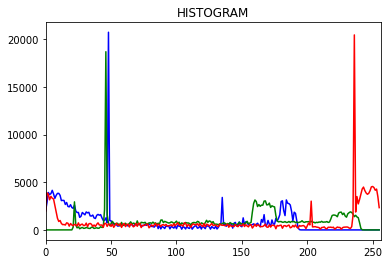

In [8]:
histogram_color(rainbow)

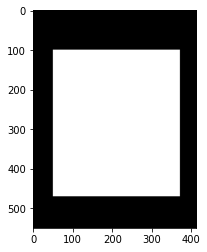

In [22]:
mask = np.zeros(rainbow.shape[:2], np.uint8)
mask[100:470,50:370]=255
plt.imshow(mask,cmap='gray')

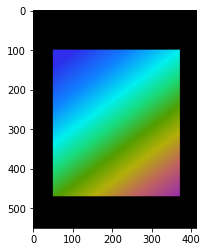

In [33]:
rainbow_mask = cv2.bitwise_and(rainbow,rainbow,mask=mask)
plt.imshow(rainbow_mask)

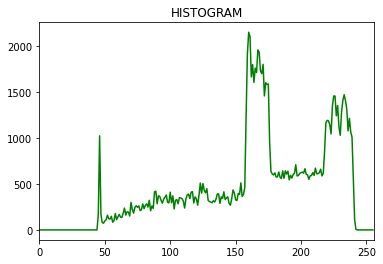

In [48]:
histogram_color(rainbow_mask,color_hist='green',mask=mask)

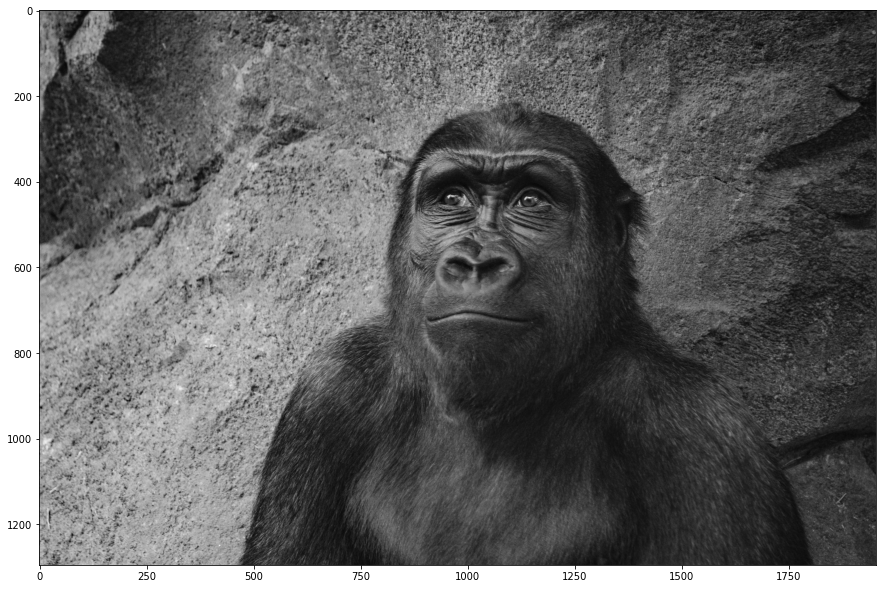

In [46]:
gorilla = cv2.imread('../DATA/gorilla.jpg',0)
display_image(gorilla, 'gray')

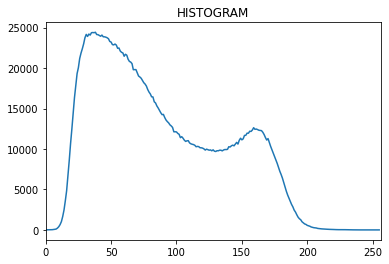

In [51]:
histogram_color(gorilla,color_hist='gray')

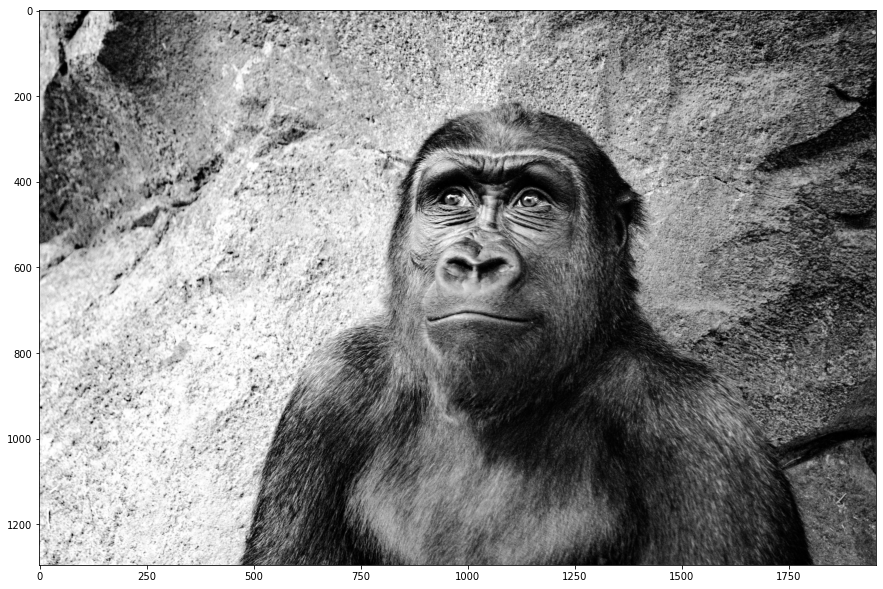

In [52]:
eq_gorilla = cv2.equalizeHist(gorilla)
display_image(eq_gorilla,'gray')

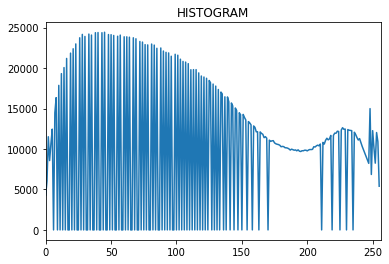

In [53]:
histogram_color(eq_gorilla,color_hist='gray')